<a href="https://colab.research.google.com/github/polariswon/polariswon/blob/master/ML_basic_KO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 기초


1.선형대수학


1.1. Numpy 행렬

In [ ]:
import numpy


def main():
    print(matrix_tutorial())

def matrix_tutorial():
    A = [[1,4,5,8],[2,1,7,3],[5,4,5,9]]
    return A

if __name__ =="__main__":
  main()


[[1, 4, 5, 8], [2, 1, 7, 3], [5, 4, 5, 9]]


1.2. Numpy 산술 연산자

In [ ]:
import numpy as np

def main():
    print(matrix_tutorial())

def matrix_tutorial():
    A = np.array([[1,4,5,8], [2,1,7,3], [5,4,5,9]])

    #normalize를 하는 이유: 

    people = np.array([30,70]) #남 30, 여 70
    normalized_people = people/(people[0]+people[1])# 남여 비율이 바뀌더라도 계산이 가능함.
    normalized_people = people/np.sum(people) # 남여 외에 나이, 학력등으로 행렬이 증가하더라도 ex([30,120,70])등 상관없이 정규화 가능

    # 분산
    low_var = np.array([1,0.9,1.2,1.5,0.7,1.0])
    high_var = np.array([1,10,5,-20,7,30])

    print("variance of low_var",np.var(low_var))
    print("variance of high_var",np.var(high_var))

    print(normalized_people)


    # 아래 코드를 작성하세요.
        
    C = np.sum(A)
    
    A = A*1/C
    
    B = np.var(A)

    return B

if __name__ == "__main__":
    main()

variance of low_var 0.0625
variance of high_var 215.58333333333334
[0.3 0.7]
0.0020861911294010062


1.3. Numpy 논리 연산자

In [ ]:
import numpy as np

def main():
    A = get_matrix()
    print(A)
    print(matrix_tutorial(A))
    

def get_matrix():
    mat = []
    first_row = input()
    n = int(first_row.split(' ')[0]) # input함수로 받은 변수가 숫자로 변경됨
    m = int(first_row.split(' ')[1]) # input함수로 받은 변수가 숫자로 변경됨
    for i in range(n):
        row = input()
        mat.append([int(x) for x in row.split(' ')]) # 공백으로 Split을 함
       
     
  
    return np.array(mat)
  
def matrix_tutorial(A):
    
    # 아래 코드를 완성하세요.
    B = A.T
    print(B)
    try:
        C = np.linalg.inv(B)
    except:
        return "not invertible"
    return(np.sum(C>0))
   

if __name__ == "__main__":
    main()


1 2 3
4 5 6
[[4 5 6]]
[[4]
 [5]
 [6]]
not invertible


1.4. 논리 연산자


In [ ]:
import numpy as np

def main():
    A = get_matrix()
    print(A)
    print(matrix_tutorial(A))
    

def get_matrix():
    mat = []
    first_row = input()
    n = int(first_row.split(' ')[0]) # 행의 갯수
    m = int(first_row.split(' ')[1]) # 열의 갯수
    for i in range(n):
        row = input()
        mat.append([int(x) for x in row.split(' ')])
           
  
    return np.array(mat)
  
def matrix_tutorial(A):
    
    # 아래 코드를 완성하세요.
    B = A.T
    print(B)
    try:
        C = np.linalg.inv(B)
    except:
        return "not invertible"
    return(np.sum(C>0))
   

if __name__ == "__main__":
    main()

2 2
1 2
3 4
[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
2


In [ ]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np

def circle(P):
    return np.linalg.norm(P) - 1 # 밑의 코드와 동일하게 동작합니다.
    # return np.sqrt(np.sum(P * P)) - 1
    
def diamond(P):
    return np.abs(P[0]) + np.abs(P[1]) - 1
    
def smile(P):
    def left_eye(P):
        eye_pos = P - np.array([-0.5, 0.5])
        return np.sqrt(np.sum(eye_pos * eye_pos)) - 0.1
    
    def right_eye(P):
        eye_pos = P - np.array([0.5, 0.5])
        return np.sqrt(np.sum(eye_pos * eye_pos)) - 0.1
    
    def mouth(P):
        if P[1] < 0:
            return np.sqrt(np.sum(P * P)) - 0.7
        else:
            return 1
    
    return circle(P) * left_eye(P) * right_eye(P) * mouth(P)

def checker(P, shape, tolerance):
    return abs(shape(P)) < tolerance

def sample(num_points, xrange, yrange, shape, tolerance):
    accepted_points = []
    rejected_points = []
    
    for i in range(num_points):
        x = np.random.random() * (xrange[1] - xrange[0]) + xrange[0]
        y = np.random.random() * (yrange[1] - yrange[0]) + yrange[0]
        P = np.array([x, y])
        
        if (checker(P, shape, tolerance)):
            accepted_points.append(P)
        else:
            rejected_points.append(P)
    
    return np.array(accepted_points), np.array(rejected_points)

xrange = [-1.5, 1.5] # X축 범위입니다.
yrange = [-1.5, 1.5] # Y축 범위입니다.
accepted_points, rejected_points = sample(100000, #  점의 개수를 줄이거나 늘려서 실행해 보세요. 너무 많이 늘리면 시간이 오래 걸리는 것에 주의합니다.
    xrange, 
    yrange, 
    smile, # smile을 circle 이나 diamond 로 바꿔서 실행해 보세요.
    0.005) # Threshold를 0.01이나 0.0001 같은 다른 값으로 변경해 보세요.

plt.figure(figsize=(xrange[1] - xrange[0], yrange[1] - yrange[0]), 
           dpi=150) # 그림이 제대로 로드되지 않는다면 DPI를 줄여보세요.
           
plt.scatter(rejected_points[:, 0], rejected_points[:, 1], c='lightgray', s=0.1)
plt.scatter(accepted_points[:, 0], accepted_points[:, 1], c='black', s=1)

plt.savefig("graph.png")


2.회귀 분석

2.1. 기울기와 절편

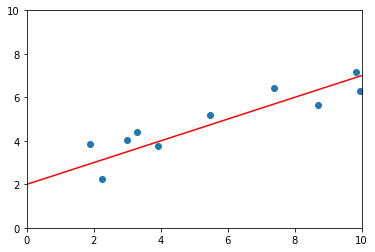

In [ ]:
import matplotlib.pyplot as plt
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

# Beta_0와 Beta_1을 변경하면서 그래프에 표시되는 선을 확인해 봄


beta_0 = 0.5   # beta_0에 저장된 기울기 값을 조정해보세요. 
beta_1 = 2 # beta_1에 저장된 절편 값을 조정해보세요.

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.

plt.savefig("test.png")

2.2. Loss function

Loss: 46.341726


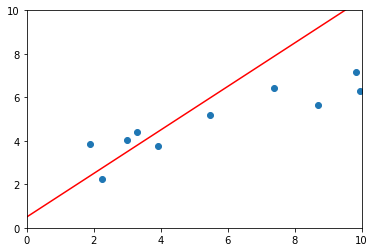

In [ ]:
import matplotlib.pyplot as plt
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    x, y, beta_0, beta_1 을 이용해 loss값을 계산한 뒤 리턴합니다.
    
    '''
    total_loss = 0
    '''
    for i in range(N):
        y_i = y[i] #실제 y(i)
        x_i = x[i] # 실제 x(i)
        y_pre = beta_0 * x_i +beta_1
        diff = (y_i - y_pre)**2
        total_loss += diff
    '''
    x = np.array(x) # list에서 numpy로 for 안돌려도 전체 스칼라를 한번에 할 수 있음.
    y = np.array(y)
    
    y_pre = beta_0 * x + beta_1
    total_loss = np.sum((y - y_pre)**2)

    return total_loss

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

beta_0 = 1 # 기울기
beta_1 = 0.5 # 절편

print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.
plt.savefig("test.png") # 저장 후 엘리스에 이미지를 표시합니다.


2.3. Scikit-learn을 이용한 회귀 분석


beta_0: 0.430781
beta_1: 2.506181
Loss: 3.721640


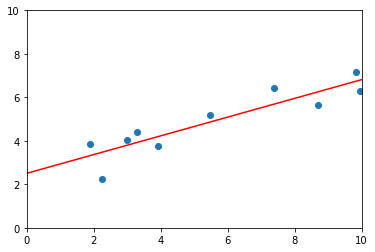

In [ ]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline


def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    이전 실습에서 구현한 loss function을 여기에 붙여넣습니다.
    '''
    x = np.array(x)
    y = np.array(y)
    total_loss = np.sum((y-(beta_0*x+beta_1))**2)
    
    return total_loss
    
    
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

train_X = np.array(X).reshape(-1,1) #하나의 행이 하나의 데이터를 가지고 있도록 변경
train_Y = np.array(Y).reshape(-1,1)



'''
여기에서 모델을 트레이닝합니다.
'''
lrmodel = LinearRegression()
lrmodel.fit(train_X,train_Y)

'''
loss가 최소가 되는 직선의 기울기와 절편을 계산함
'''
beta_0 = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
beta_1 = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점을 그립니다.
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선을 그립니다.

plt.xlim(0, 10) # 그래프의 X축을 설정합니다.
plt.ylim(0, 10) # 그래프의 Y축을 설정합니다.
plt.savefig("test.png") # 저장 후 엘리스에 이미지를 표시합니다.

2.4. 다중회귀분석

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

import csv
csvreader = csv.reader(open("Advertising.csv"))

x = [] # 파이썬 리스트 형식
y = []


next(csvreader)# 한줄을 건너 뛰게 됨
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4]) ##문자열 형식으로 저장되기 때문에 float로 실수형으로 변경함.
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)

lrmodel = LinearRegression()
lrmodel.fit(X, Y)

beta_0 = lrmodel.coef_[0] # 0번째 변수에 대한 계수 (페이스북)
beta_1 = lrmodel.coef_[1] # 1번째 변수에 대한 계수 (TV)
beta_2 = lrmodel.coef_[2] # 2번째 변수에 대한 계수 (신문)
beta_3 = lrmodel.intercept_ # y절편 (기본 판매량)
print(X)
print(Y)
print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)

def expected_sales(fb, tv, newspaper, beta_0, beta_1, beta_2, beta_3):
    '''
    FB에 fb만큼, TV에 tv만큼, Newspaper에 newspaper 만큼의 광고비를 사용했고,
    트레이닝된 모델의 weight 들이 beta_0, beta_1, beta_2, beta_3 일 때
    예상되는 Sales 의 양을 출력합니다.
    '''
    sales = beta_0 * fb +beta_1 *tv + beta_2 * newspaper +beta_3
    
    return sales

print("예상 판매량: %f" % expected_sales(12,200, 10, beta_0, beta_1, beta_2, beta_3))

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

import csv

csv_reader = csv.reader(open('./Advertising.csv'))

next(csv_reader)
x=[]
y=[]
for line in csv_reader:
    x_i = [float(line[1]),float(line[2]),float(line[3])]
    y_i = float(line[4])
    
    x.append(x_i)
    y.append(y_i)
    
X = np.array(x)
Y = np.array(y)
    
    
    
# 다항식 회귀분석을 진행하기 위해 변수들을 조합합니다.
X_poly = []
for x_i in X:
    X_poly.append([
        x_i[0] * x_i[1], # X_1^2
        x_i[1] * x_i[2], # X_2
        x_i[0] **2, # X_2 * X_3
        x_i[2] * x_i[0]# X_3
    ])

# X, Y를 80:20으로 나눕니다. 80%는 트레이닝 데이터, 20%는 테스트 데이터입니다.

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=50)

# x_train, y_train에 대해 다항식 회귀분석을 진행합니다.
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

beta_0 = lrmodel.coef_[0]
beta_1 = lrmodel.coef_[1]
beta_2 = lrmodel.coef_[2]
beta_3 = lrmodel.intercept_ 

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)


'''
def expected_sales(x_i[0],x_i[1]*x_i[2],x_i[2],beta_0,beta_1,beta_2,beta_3):

    sales = beta_0 * (x_i[0]**2) + beta_1*x_i[1]+beta_2*x_i[1]*x_i[2]+beta_2*x_i[2]+beta_3
    
    
    return sales
'''    
#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구합니다.
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구합니다. 이 값이 1 미만이 되도록 모델을 구성해 봅니다.
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

beta_0: 0.001341
beta_1: -0.000185
beta_2: 0.000032
beta_3: 8.308199
MSE on train data: 1.5313694510644986
MSE on test data: 0.8938102131413188


[['the', 6187927.0], ['of', 2941790.0], ['and', 2682878.0], ['to', 2560346.0], ['a', 2150885.0], ['in', 1883295.0], ['that', 1115382.0], ['it', 1089559.0], ['is', 998867.0], ['was', 923975.0], ['i', 905323.0], ['for', 851723.0], ["'s", 807307.0], ['on', 724197.0], ['you', 695595.0], ['he', 681379.0], ['be', 664780.0], ['with', 652050.0], ['as', 517788.0], ['by', 513078.0], ['at', 478178.0], ['have', 473693.0], ['are', 470949.0], ['this', 463240.0], ['not', 462777.0], ['but', 456072.0], ['had', 445396.0], ['his', 433599.0], ['they', 433475.0], ['from', 413535.0], ['she', 380284.0], ['which', 372034.0], ['or', 370855.0], ['we', 358792.0], ['an', 344046.0], ["n't", 332856.0], ['there', 327968.0], ['her', 327014.0], ['were', 322832.0], ['one', 291402.0], ['do', 280702.0], ['been', 268723.0], ['all', 262447.0], ['their', 260919.0], ['has', 259443.0], ['would', 255198.0], ['will', 254566.0], ['what', 249481.0], ['if', 237107.0], ['can', 236321.0], ['when', 214281.0], ['so', 212158.0], ['no',

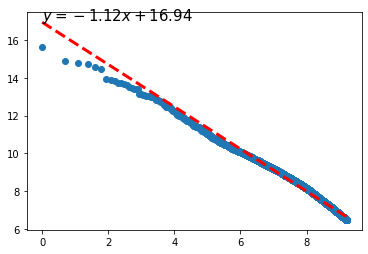

In [ ]:
import operator
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


def main():
    words = read_data()
    words = sorted(words,key=lambda x: x[1],reverse=True) # words.txt 단어를 빈도수 순으로 정렬합니다.
    print(words)
    # 정수로 표현된 단어를 X축 리스트에, 각 단어의 빈도수를 Y축 리스트에 저장합니다.  
    X = list(range(1, len(words)+1))
    Y = [x[1] for x in words]
    
    # X, Y 리스트를 array로 변환합니다. 
    X, Y = np.array(X).reshape(-1,1), np.array(Y)
    
    # X, Y의 각 원소 값에 log()를 적용합니다.
    X, Y = np.log(X), np.log(Y)
    
    # 기울기와 절편을 구한 후 그래프와 차트를 출력합니다. 
    slope, intercept = do_linear_regression(X, Y)
    draw_chart(X, Y, slope, intercept)
    
    return slope, intercept


# read_data() - words.txt에 저장된 단어와 해당 단어의 빈도수를 리스트형으로 변환합니다.
def read_data():
    txt_data = np.loadtxt("words.txt",delimiter=",",dtype=np.str)
    # words.txt 에서 단어들를 읽어, 
    # [[단어1, 빈도수], [단어2, 빈도수] ... ]형으로 변환해 리턴합니다.
    dic = []
    
    for line in txt_data:
       x_i = [line[0],float(line[1])]
       dic.append(x_i)
    return dic
    

# do_linear_regression() - 임포트한 sklearn 패키지의 함수를 이용해 그래프의 기울기와 절편을 구합니다.
def do_linear_regression(X, Y):
    
    lrmodel = LinearRegression()
    lrmodel.fit(X,Y)
    
    slope = lrmodel.coef_[0]
    intercept = lrmodel.intercept_
    
    return (slope, intercept)


# draw_chart() - matplotlib을 이용해 차트를 설정합니다.
def draw_chart(X, Y, slope, intercept):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X, Y)

    # 차트의 X, Y축 범위와 그래프를 설정합니다.
    min_X = min(X)
    max_X = max(X)
    min_Y = min_X * slope + intercept
    max_Y = max_X * slope + intercept
    plt.plot([min_X, max_X], [min_Y, max_Y], 
             color='red',
             linestyle='--',
             linewidth=3.0)
    
    # 기울과와 절편을 이용해 그래프를 차트에 입력합니다.
    ax.text(min_X, min_Y + 0.1, r'$y = %.2lfx + %.2lf$' % (slope, intercept), fontsize=15)
    
    plt.savefig('chart.png')
  

if __name__ == "__main__":
     main()

3. 나이브 베이즈 분류

3.1. 확률로 파이 계산하기

Estimated pi = 3.144080


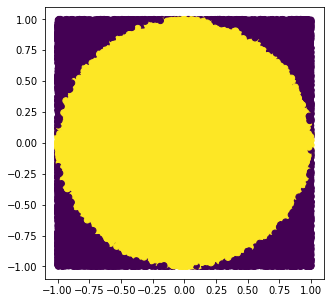

In [ ]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def main():
    plt.figure(figsize=(5,5))
    
    X = []
    Y = []
    
    # N을 10배씩 증가할 때 파이 값이 어떻게 변경되는지 확인해보세요.
    N = 100000
    
    for i in range(N):
        X.append(np.random.rand() * 2 - 1)
        Y.append(np.random.rand() * 2 - 1)
    X = np.array(X)
    Y = np.array(Y)
    distance_from_zero = np.sqrt(X * X + Y * Y)
    is_inside_circle = distance_from_zero <= 1
    
    print("Estimated pi = %f" % (np.average(is_inside_circle) * 4))
    
    plt.scatter(X, Y, c=is_inside_circle)
    plt.savefig('circle.png')


if __name__ == "__main__":
    main()

3.2. 유방암 검사키트

In [ ]:
def main():
    sensitivity = 0.8
    prior_prob = 0.004
    false_alarm = 0.1

    print("%.2lf%%" % (100 * mammogram_test(sensitivity, prior_prob, false_alarm)))

def mammogram_test(sensitivity, prior_prob, false_alarm):
    p_a1_b1 = sensitivity

    p_b1 =prior_prob   # p(B = 1)

    p_b0 = 1-p_b1    # p(B = 0)

    p_a1_b0 = false_alarm# p(A = 1|B = 0)

    p_a1 = p_a1_b0*p_b0+ p_a1_b1* p_b1  # p(A = 1)

    p_b1_a1 = p_a1_b1* p_b1 / p_a1 # p(B = 1|A = 1)

    return p_b1_a1

if __name__ == "__main__":
    main()


3.11%


3.3.나이브 베이즈 분류기

In [ ]:
import re
import math
import numpy as np

def main():
    M1 = {'r': 0.7, 'g': 0.2, 'b': 0.1} # M1 기계의 사탕 비율
    M2 = {'r': 0.3, 'g': 0.4, 'b': 0.3} # M2 기계의 사탕 비율
    
    test = {'r': 4, 'g': 3, 'b': 3} # 주어진 사탕 값

    print(naive_bayes(M1, M2, test, 0.7, 0.3))

def naive_bayes(M1, M2, test, M1_prior, M2_prior):
    M1_likelihood = M1['r']** test['r']*M1['g']**test['g']*M1['b']**test['b']
    M1_posterior = M1_likelihood*M1_prior
    
    M2_likelihood = M2['r']** test['r']*M2['g']**test['g']*M2['b']**test['b']
    M2_posterior = M2_likelihood*M2_prior
    
    M1_normalized = M1_posterior /(M1_posterior+M2_posterior)
    M2_normalized = M2_posterior /(M1_posterior+M2_posterior)

    return [M1_normalized, M2_normalized]

if __name__ == "__main__":
    main()

"""
나이브 베이즈 분류기를 직접 구현해 보겠습니다. 두 개의 사탕 기계를 살펴보겠습니다.
첫 번째 기계 M_1: 
Theta  : {\theta_{red} = 0.7, \theta_{green} = 0.2, \theta_{blue} = 0.1}θ 
red
​
 =0.7,θ 
green
​
 =0.2,θ 
blue
​
 =0.1
두 번째 기계 M_2M 
2
​
  : {\theta_{red} = 0.3, \theta_{green} = 0.4, \theta_{blue} = 0.3}θ 
red
​
 =0.3,θ 
green
​
 =0.4,θ 
blue
​
 =0.3
두 기계에서 사탕을 뽑을 확률은 다음과 같습니다.

p(M_1) = 0.7p(M 
1
​
 )=0.7
p(M_2) = 0.3p(M 
2
​
 )=0.3
다음과 같이 10개의 사탕을 뽑았을 때 이 사탕들이 몇 번째 기계에서 나왔을지 확률로 표현해보는 코드를 작성해보겠습니다.

red - 4
green - 3
blue - 3
이 확률은 p(M_k|x)p(M 
k
​
 ∣x), k \in {1, 2}k∈1,2 로 나타낼 수 있습니다. 나이브 법칙을 적용하면 p(M_k|x) = \frac{p(M_k)p(x|M_k)}{p(x)}p(M 
k
​
 ∣x)= 
p(x)
p(M 
k
​
 )p(x∣M 
k
​
 )
​
 가 됩니다. 이때 두 기계의 p(x)p(x) 는 같으므로 무시하겠습니다.

p(M_1)p(M 
1
​
 ) 와 p(M_2)p(M 
2
​
 ) 의 상대적인 확률은 다음과 같습니다.

p(M_1|x) \propto p(M_1)p(x|M_1)p(M 
1
​
 ∣x)∝p(M 
1
​
 )p(x∣M 
1
​
 )
=0.7 \times (0.7^4 \times 0.2^3 \times 0.1^3)=0.7×(0.7 
4
 ×0.2 
3
 ×0.1 
3
 )
= 1.345 \times 10^{-6}=1.345×10 
−6
 

p(M_2|x) \propto p(M_2)p(x|M_2)p(M 
2
​
 ∣x)∝p(M 
2
​
 )p(x∣M 
2
​
 )
=0.3 \times (0.3^4 \times 0.4^3 \times 0.3^3)=0.3×(0.3 
4
 ×0.4 
3
 ×0.3 
3
 )
= 4.199 \times 10^{-6}=4.199×10 
−6
 

두 번째 기계에서 뽑혔을 확률이 훨씬 더 높은 것을 알 수 있습니다. 두 확률을 표준화(Normalize)하면 다음과 같습니다.

(1.345 \times 10^{-6}, 4.199 \times 10^{-6})(1.345×10 
−6
 ,4.199×10 
−6
 )
\rightarrow (0.243, 0.757)→(0.243,0.757)

즉 나이브 베이즈 분류기를 사용했을 때 10개의 사탕이 두번째 기계에서 뽑혔을 확률은 75.7%입니다.

[0.24254275200230901, 0.757457247997691]


3.4. Bag of words

In [ ]:
import re
special_chars_remover = re.compile("[^\w'|_]")

def main():
    sentence = '델을 으로 직접 구현하겠습니다.'
    bow = create_BOW(sentence)
  
    print(bow)


def create_BOW(sentence):
    bow = {} 
    sentence_lowered = sentence.lower()
    sentence_without_special_characters = remove_special_characters(sentence_lowered)
    splitted_sentence = sentence_without_special_characters.split()
    splitted_sentence_filtered = [ token for token in splitted_sentence
        if len(token) >=1
        ]
    for token in splitted_sentence_filtered:
        bow.setdefault(token,0) # 토큰이 없으면 0으로 세팅
        bow[token]+=1   
        
     
    

    return bow


def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)


if __name__ == "__main__":
    main()


{'델을': 1, '으로': 1, '직접': 1, '구현하겠습니다': 1}


3.5.네이버 영화평 감정 분석

In [ ]:
import io
import numpy
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
import re
import math

special_chars_remover = re.compile("[^\w'|_]")

def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)

def main():
    training_sentences = read_data()
    testing_sentence = ["유치하고 촌스러운 애니메이션 도대체 왜 찍었는지 의문이 가는 영화 ㅎ 튼튼한 각본을 살리지 못한 그때의 기술력을 원망할뿐","안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화. 사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화"]

    prob_pair = naive_bayes(training_sentences, testing_sentence)
    
    plot_title = testing_sentence
    if len(plot_title) > 50: plot_title = plot_title[:50] + "..."
    visualize_boxplot(plot_title,
                  list(prob_pair),
                  ['Negative', 'Positive'])

def naive_bayes(training_sentences, testing_sentence):
    log_prob_negative = calculate_doc_prob(training_sentences[0], testing_sentence, 0.1) + math.log(0.5)
    log_prob_positive = calculate_doc_prob(training_sentences[1], testing_sentence, 0.1) + math.log(0.5)
    prob_pair = normalize_log_prob(log_prob_negative, log_prob_positive)
    
    return prob_pair

def read_data():
    training_sentences = [[], []]
    
    
    training_sentences = np.loadtxt("ratings.txt",delimiter='     ',dtype=np.str)
   
    
    '''
    숙제 1
    여기서 파일을 읽어 training_sentences에 저장합니다.
    '''
    
    return [' '.join(training_sentences[0]), ' '.join(training_sentences[1])]

def normalize_log_prob(prob1, prob2):
    
    '''
    숙제 4
    로그로 된 확률값을 표준화합니다.
    이 부분은 이미 작성되어 있습니다.
    '''
    
    maxprob = max(prob1, prob2)

    prob1 -= maxprob
    prob2 -= maxprob
    prob1 = math.exp(prob1)
    prob2 = math.exp(prob2)

    normalize_constant = 1.0 / float(prob1 + prob2)
    prob1 *= normalize_constant
    prob2 *= normalize_constant

    return (prob1, prob2)

def calculate_doc_prob(training_sentence, testing_sentence, alpha):
    logprob = 0

    training_model = create_BOW(training_sentence)
    testing_model = create_BOW(testing_sentence)

    Sum = sum(training_model.values())
    #print(training_model['영화']/Sum)
    
    
    for i in testing_model:
        #print(i)
        if i in training_model:
            #print(training_model[i]/Sum)
            logprob+=math.log(training_model[i]/Sum)
        else:
            #print(alpha/Sum)
            logprob+=math.log(alpha/Sum)
    #print(logprob)
 
    '''
    숙제 3
    training_sentence로 만들어진 모델이,
    testing_sentence를 만들어 낼 **로그 확률** 을 구합니다.
    일반 숫자에서 로그값을 만들기 위해서는 math.log() 를 사용합니다.
    
    일반 숫자에서의 곱셈이 로그에서는 덧셈, 나눗셈은 뺄셈이 된다는 점에 유의하세요.
    예) 3 * 5 = 15
        log(3) + log(5) = log(15)
        
        5 / 2 = 2.5
        log(5) - log(2) = log(2.5)
    '''

    return logprob

def create_BOW(sentence):
    bow = {}
    sentence = np.str(sentence)
    sentence_lowered = sentence.lower()
    sentence_without_speacial_characters = remove_special_characters(sentence_lowered)
    splitted_sentence = sentence_without_speacial_characters.split()
    splitted_sentence_filtered = [token for token in splitted_sentence 
                                    if len(token)>=1
                                    ]
    
    for token in splitted_sentence_filtered:
        bow.setdefault(token,0)
        bow[token] += 1
        
    return bow

'''
이 밑의 코드는 시각화를 위한 코드입니다.
궁금하다면 살펴보세요.
'''
def visualize_boxplot(title, values, labels):
    width = .35

    print(title)
    
    fig, ax = plt.subplots()
    ind = numpy.arange(len(values))
    rects = ax.bar(ind, values, width)
    ax.bar(ind, values, width=width)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(labels)

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., height + 0.01, '%.2lf%%' % (height * 100), ha='center', va='bottom')

    autolabel(rects)

    plt.savefig("image.svg", format="svg")


if __name__ == "__main__":
    main()


OSError: ignored

4. K-Means

4.1. PCA 차원 축소

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


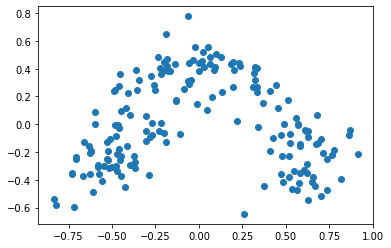

In [32]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import csv

def main():
    X, attributes = input_data()
    pca_array = normalize(X)
    print(pca_array)
    pca, pca_array = run_PCA(X, 2)
    visualize_2d_wine(pca_array)

def input_data():
    X = []
    attributes = []
    with open("attributes.txt") as fp:
        attributes = fp.readlines()
    attributes = [x.strip() for x in attributes]
    
    csvreader = csv.reader(open("wine.csv"))
    for line in csvreader:
        float_numbers = [float(x) for x in line]
        X.append(float_numbers)
      
    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components =num_components)
    pca.fit(X)
    pca_array = pca.transform(X)
       
    
    return pca, pca_array
    
def normalize(X):
    for i in range(X.shape[1]):
        X[:,i] = X[:,i]-np.min(X[:,i])
        X[:,i] = X[:,i]/np.max(X[:,i])
        
    
    '''
    각각의 feature에 대해,
    178개의 데이터에 나타나는 해당하는 feature의 값이 최소 0, 최대 1이 되도록
    선형적으로 데이터를 이동시킵니다.
    '''

    return X

def visualize_2d_wine(X):
    '''X를 시각화하는 코드를 구현합니다.'''
    plt.scatter(X[:,0],X[:,1])
    plt.savefig("image.png")


if __name__ == '__main__':
    main()

3.2. K-Means 클러스터링

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


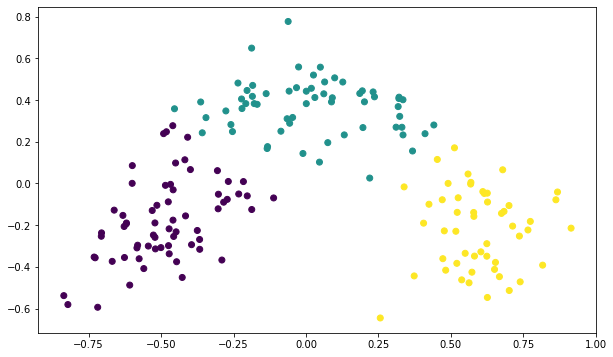

In [35]:
import sklearn.decomposition
import sklearn.cluster
import matplotlib.pyplot as plt
import numpy as np

def main():
    X, attributes = input_data() #데이터를 읽음
    X = normalize(X)
    pca, pca_array = run_PCA(X, 2) # 13차원에서 2차원으로 차원을 낮춤
    labels = kmeans(pca_array, 3, [0, 1, 2]) # 3개의 클래스를 찾고, 시작점이 0,1,2라는것을 의미
    visualize_2d_wine(pca_array, labels) # 2d scatter plot으로 구현
    print(labels)
  
    
def input_data():
    X = []
    attributes = []
    
    with open('wine.csv') as fp:
        for line in fp:
            X.append([float(x) for x in line.strip().split(',')])
    
    with open('attributes.txt') as fp:
        attributes = [x.strip() for x in fp.readlines()]

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X)
    pca_array = pca.transform(X)

    return pca, pca_array

def kmeans(X, num_clusters, initial_centroid_indices): # 178x2, 클러스터 개수, 중심점 indexs
    import time
    
    N = len(X)
    centroids = X[initial_centroid_indices]
    labels = np.zeros(N)  # labels
    
    while True:
          
         
        '''
        Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
        중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당하여
        labels[i]에 넣습니다.
        가까운 중심점을 찾을 때는, 유클리드 거리를 사용합니다.
        미리 정의된 distance 함수를 사용합니다.
        '''
        is_changed = False
        for i in range(N):
            distances = []
            for k in range(num_clusters):
                #X[i]와 centroid[k]의 거리를 labels에 집어 넣는것
                k_dist = distance(X[i],centroids[k])
                distances.append(k_dist)
            if labels[i] != np.argmin(distances):
                    is_changed = True
            labels[i] = np.argmin(distances)
         
        '''
        Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
        중심점은 클러스터 내 데이터 포인트들의 위치의 *산술 평균*
        으로 합니다.
        '''
        for k in range(num_clusters):
            x = X[labels == k][:,0]   # K의 값을 가진 것만 빼올수 있음.
            y = X[labels == k][:,1] 
            
            x = np.mean(x)
            y = np.mean(y)
            centroids[k]= [x,y]
                
        '''
        Step 3. 만약 클러스터의 할당이 바뀌지 않았다면 알고리즘을 끝냅니다.
        아니라면 다시 반복합니다.
        '''
        if not is_changed:
             break
             
    return labels

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
    
def normalize(X):
    for dim in range(len(X[0])):
        X[:, dim] -= np.min(X[:, dim])
        X[:, dim] /= np.max(X[:, dim])
    return X

'''
이전에 더해, 각각의 데이터 포인트에 색을 입히는 과정도 진행합니다.
'''

def visualize_2d_wine(X, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:,0],X[:,1],c=labels)
    plt.savefig("image.svg", format="svg")
   

if __name__ == '__main__':
    main()